# Clustering
[Source](https://scikit-learn.org/stable/modules/clustering.html)
### Many different algortihms with very different results
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### Part 1
##### When doing these exercises print your data often to see what you get from the algorithms
1. Create a synthetic dataset with sklearn.datasets.make_classification
  - `X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)`
  - X represents the 2 features in a list
  - y represents the classification label for each feature set
2. Based on the labels scatter plot each of the 1000 entries in one of 2 different colors
3. Now without knowing the labels (we do know them ofcourse) we will try different algorithms on the data
    - import AffinityPropagation from sklearn.cluster 
    - Create a model: `model = AffinityPropagation(damping=0.7)`
    - Fit the model with the data from the features (X): `model.fit(X)`
    - And assign cluster to each sample: `p=model.predict(X)`
    - Find the unique clusters with `np.unique()` method
    - Scatterplot each sample, colored by its cluster
    - Compare with the scatterplot of the actual classifications
4. Try with cluster algorithm: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
    - Use the documentation to create DBSCAN clusters for the feature samples
    - Scatter plot the result
5. Do the same with [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)
6. Finally do it with the the [Birch algortihm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
    - You could try to with the [Gaussian Mixture algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

### Part 2
Code along and follow the steps in [this tutorial](https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python#1-loading-the-dataset--exploratory-data-analysis) to use DBSCAN clustering algorithm on articles to try and categorise them into topics. HINT: Install Spacy with following command `!pip install -U pip setuptools wheel && pip install -U spacy && python -m spacy download en_core_web_sm`

[Find more about NLP with Spacy here](https://spacy.io/usage/spacy-101)

**What is Lemmatization? Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.**

For PCA use this import: `from sklearn.decomposition import PCA` (dimensionality reduction)
For K-Means clustering algorithm: `from sklearn.cluster import KMeans, DBSCAN`

Create a function that can take a cluster number and return all titles in that cluster. Do you see any pattern?

Create a synthetic dataset with sklearn.datasets.make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X represents the 2 features in a list
y represents the classification label for each feature set

In [46]:
import sklearn.datasets as sk
import numpy as np


X, y = sk.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

Based on the labels scatter plot each of the 1000 entries in one of 2 different colors

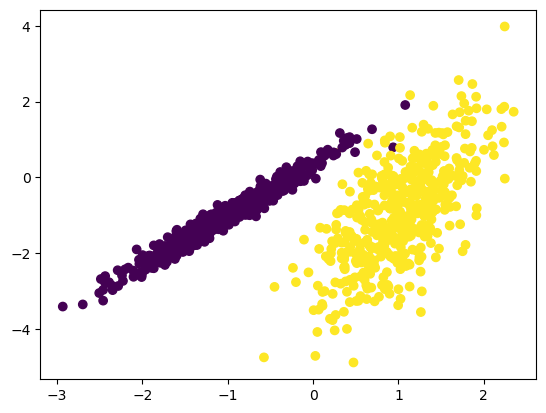

In [50]:
import matplotlib.pyplot as plt
from itertools import cycle


labels = np.unique(y)



plt.scatter(X[:,0], X[:,1], c=y)


3. Now without knowing the labels (we do know them ofcourse) we will try different algorithms on the data
    - import AffinityPropagation from sklearn.cluster 
    - Create a model: `model = AffinityPropagation(damping=0.7)`
    - Fit the model with the data from the features (X): `model.fit(X)`
    - And assign cluster to each sample: `p=model.predict(X)`
    - Find the unique clusters with `np.unique()` method
    - Scatterplot each sample, colored by its cluster
    - Compare with the scatterplot of the actual classifications

25


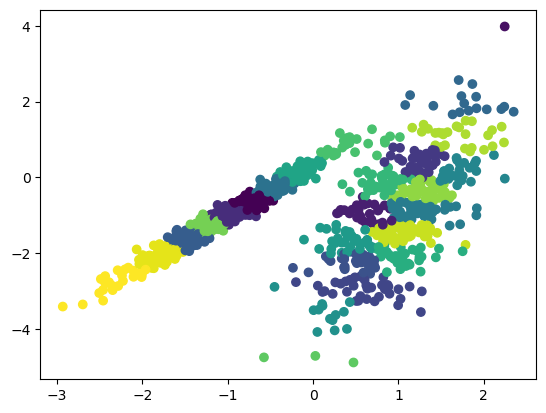

In [99]:
from sklearn.cluster import AffinityPropagation 
model = AffinityPropagation(damping=0.7)
model.fit(X)
p=model.predict(X)
unique_clusters = np.unique(p)
print(unique_clusters.size)
plt.scatter(X[:,0], X[:,1], c=p)





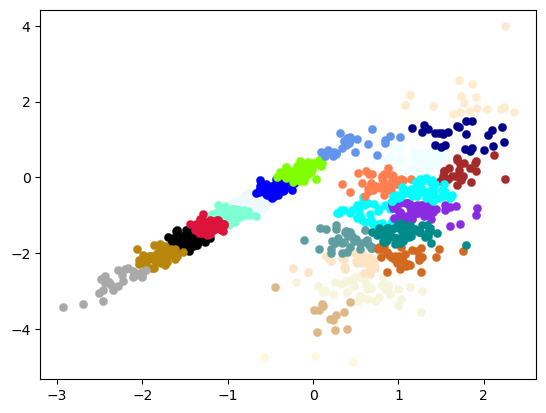

In [122]:
# Plot the clusters in different colors
from matplotlib import colors

fig = plt.figure()
ax = fig.add_subplot(111)
colors = cycle(colors.CSS4_COLORS)

for k, col in zip(range(unique_clusters.size),colors):
    my_members = (p == k)
    
    x, y = X[my_members,0], X[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    

4. Try with cluster algorithm: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
    - Use the documentation to create DBSCAN clusters for the feature samples
    - Scatter plot the result

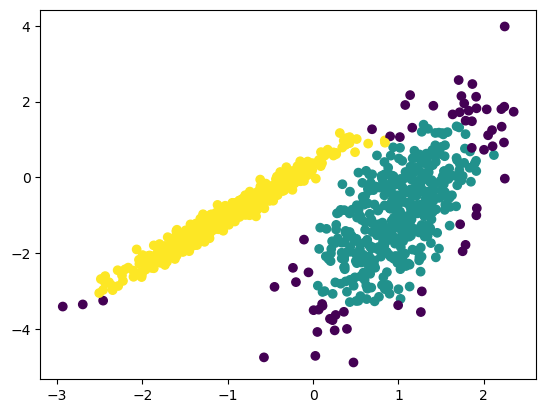

In [128]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.3, min_samples=10).fit(X)

clustering.labels_

plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

Do the same with [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

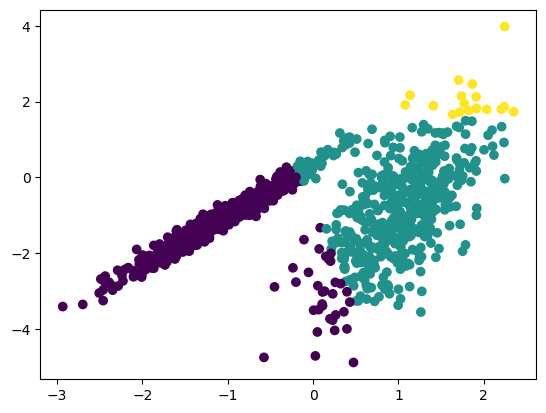

In [133]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, 
                                   n_samples=1000)

ms = MeanShift(bandwidth=bandwidth) #, bin_seeding=True) # can be used to speed up process, since fewer kernels are created.
ms.fit(X)



plt.scatter(X[:,0], X[:,1], c=ms.labels_)
    

Finally do it with the the [Birch algortihm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
    - You could try to with the [Gaussian Mixture algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

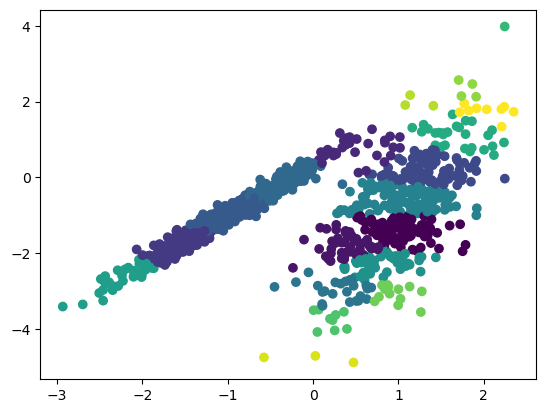

In [148]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=None)
brc.fit(X)
plt.scatter(X[:,0], X[:,1], c=brc.fit_predict(X))

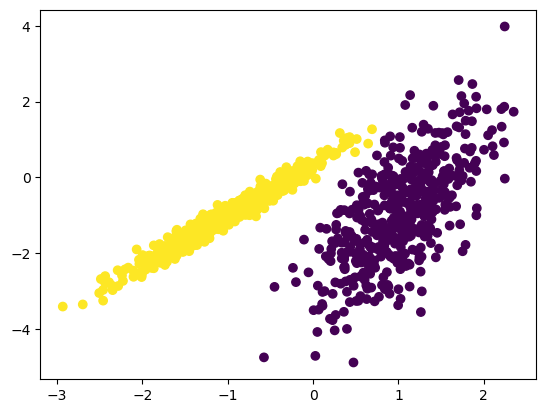

In [150]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

plt.scatter(X[:,0], X[:,1], c=gm.fit_predict(X))